In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitute combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#Create a practice set of random latitude and longitude combinations
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x,y)
#coordinates

In [5]:
#Use the Tuple() function to display the latitude and longitude combination
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [8]:
#Import the requests library
import requests

#Import the API Key
from config import weather_api_key

In [9]:
#Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | camabatela
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | adre
Processing Record 7 of Set 1 | varhaug
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | elk city
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | flinders
Processing Record 16 of Set 1 | deputatskiy
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | mandiana
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of

Processing Record 35 of Set 4 | rio verde de mato grosso
Processing Record 36 of Set 4 | saskylakh
Processing Record 37 of Set 4 | bredasdorp
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | shache
Processing Record 40 of Set 4 | armeria
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | lasa
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | sidi ali
Processing Record 45 of Set 4 | marrakesh
Processing Record 46 of Set 4 | kawana waters
City not found. Skipping...
Processing Record 47 of Set 4 | riyadh
Processing Record 48 of Set 4 | calama
Processing Record 49 of Set 4 | lata
Processing Record 50 of Set 4 | russellville
Processing Record 1 of Set 5 | pontes e lacerda
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | tetiz
Processing Record 4 of Set 5 | marsassoum
Processing Record 5 of Set 5 | yanan
City not found. Skipping...
Processing Record 6 of Set 5 | pombia
Processing Record 7 of Set 5 | kirov

Processing Record 22 of Set 8 | gangotri
City not found. Skipping...
Processing Record 23 of Set 8 | kruisfontein
Processing Record 24 of Set 8 | tsiroanomandidy
Processing Record 25 of Set 8 | maloy
Processing Record 26 of Set 8 | praia da vitoria
Processing Record 27 of Set 8 | turka
Processing Record 28 of Set 8 | fuyang
Processing Record 29 of Set 8 | taltal
Processing Record 30 of Set 8 | hengshan
Processing Record 31 of Set 8 | doume
Processing Record 32 of Set 8 | waingapu
Processing Record 33 of Set 8 | alofi
Processing Record 34 of Set 8 | leningradskiy
Processing Record 35 of Set 8 | san patricio
Processing Record 36 of Set 8 | cachira
Processing Record 37 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 40 of Set 8 | oranjestad
Processing Record 41 of Set 8 | birjand
Processing Record 42 of Set 8 | gat
Processing Record 43 of Set 8 | wajima
Processi

Processing Record 13 of Set 12 | warren
Processing Record 14 of Set 12 | novyy buh
Processing Record 15 of Set 12 | moerai
Processing Record 16 of Set 12 | basoko
Processing Record 17 of Set 12 | bereda
Processing Record 18 of Set 12 | birao
Processing Record 19 of Set 12 | fort nelson
Processing Record 20 of Set 12 | henzada
City not found. Skipping...
Processing Record 21 of Set 12 | aquiraz
Processing Record 22 of Set 12 | labuhan
Processing Record 23 of Set 12 | bathsheba
Processing Record 24 of Set 12 | lujan
Processing Record 25 of Set 12 | chabahar
Processing Record 26 of Set 12 | edd
Processing Record 27 of Set 12 | kokopo
Processing Record 28 of Set 12 | cauquenes
Processing Record 29 of Set 12 | marcona
City not found. Skipping...
Processing Record 30 of Set 12 | dalby
Processing Record 31 of Set 12 | awjilah
Processing Record 32 of Set 12 | ca mau
Processing Record 33 of Set 12 | nichinan
Processing Record 34 of Set 12 | limon
Processing Record 35 of Set 12 | yuzhno-sukhokum

In [12]:
#Loop through all the cities in our list
#for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
        
    #Create endpoint URL with each city
    #city_url = url + "%q=" + cities[i]

In [13]:
len(city_data)

548

In [14]:
#Convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,-33.77,67,0,6.91,CA,2022-02-05 15:57:41
1,Vaini,-21.2000,-175.2000,75.36,100,100,8.05,TO,2022-02-05 15:56:03
2,Tiksi,71.6872,128.8694,-21.48,98,100,7.63,RU,2022-02-05 15:57:42
3,Camabatela,-8.1881,15.3750,68.50,92,100,2.68,AO,2022-02-05 15:57:42
4,Adre,13.4667,22.2000,75.88,15,4,13.09,TD,2022-02-05 15:57:42
5,Varhaug,58.6147,5.6457,42.89,93,100,30.76,NO,2022-02-05 15:57:43
6,Upernavik,72.7868,-56.1549,0.88,97,100,3.42,GL,2022-02-05 15:56:10
7,Vostok,46.4856,135.8833,-9.47,99,100,3.00,RU,2022-02-05 15:57:43
8,Saint-Philippe,-21.3585,55.7679,81.99,85,100,19.80,RE,2022-02-05 15:57:43
9,Elk City,35.4120,-99.4043,31.15,55,0,9.22,US,2022-02-05 15:57:44


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2022-02-05 15:57:41,68.2191,-135.0107,-33.77,67,0,6.91
1,Vaini,TO,2022-02-05 15:56:03,-21.2000,-175.2000,75.36,100,100,8.05
2,Tiksi,RU,2022-02-05 15:57:42,71.6872,128.8694,-21.48,98,100,7.63
3,Camabatela,AO,2022-02-05 15:57:42,-8.1881,15.3750,68.50,92,100,2.68
4,Adre,TD,2022-02-05 15:57:42,13.4667,22.2000,75.88,15,4,13.09
5,Varhaug,NO,2022-02-05 15:57:43,58.6147,5.6457,42.89,93,100,30.76
6,Upernavik,GL,2022-02-05 15:56:10,72.7868,-56.1549,0.88,97,100,3.42
7,Vostok,RU,2022-02-05 15:57:43,46.4856,135.8833,-9.47,99,100,3.00
8,Saint-Philippe,RE,2022-02-05 15:57:43,-21.3585,55.7679,81.99,85,100,19.80
9,Elk City,US,2022-02-05 15:57:44,35.4120,-99.4043,31.15,55,0,9.22


In [16]:
#Create the output file CSV
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

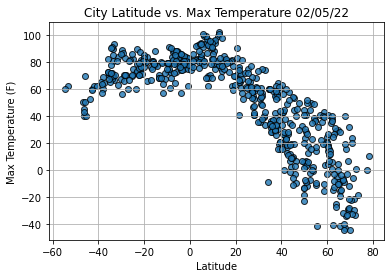

In [18]:
#Import time module
import time

#Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Citites")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

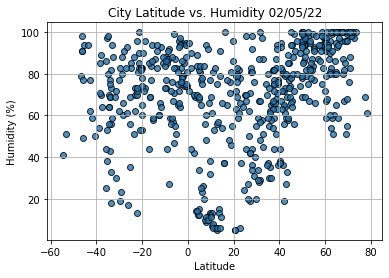

In [19]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

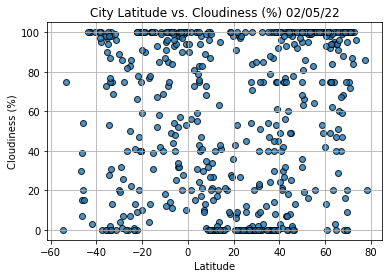

In [20]:
#Build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

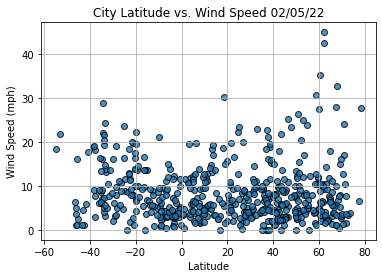

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()